# Writing frame stream into video

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"    

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S01\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s01\env

d:\html_doc\program\opencv\packt\s01\env\lib\site-packages
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s01\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


## Reading frame from file

In [2]:
import cv2

#capture = cv2.VideoCapture(0)
capture = cv2.VideoCapture('birds.mp4')
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))

capture.isOpened()

Frame count: 187
Frame width: 1906
Frame height: 1080
Frame rate: 30.0


True

count == 30
count == 60
count == 90
count == 120
count == 150
count == 180
Reached end of video
frame[30] shape ==(1080, 1906, 3) 
  Shape: (1080, 1906, 3)   Data type: uint8
[ [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] ]
[ [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] ]
[ [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] ]
[ [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] ]
[ [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] [252 252 252] ]  frame: uint8
frame[60] shape ==(1080, 1906, 3) 
  Shape: (1080, 1906, 3)   Data type: uint8
[ [39 39 39] [32 32 32] [72 72 72] [110 110 110] [146 146 146] [182 182 182] [199 199 199] ]
[ [72 72 72] [27 27 27] [65 65 65] [107 107 107] [145 145 145] [182 182 182] [201 201 201] ]
[ [6 6 6] [8 8 8] [59 59 59] [104 10

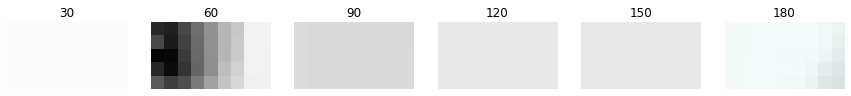

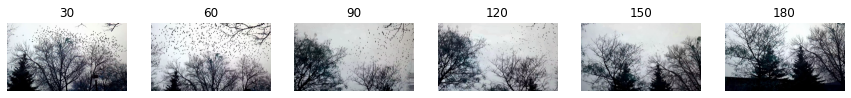

key -1


In [3]:
count = 0
image_frames =[]

    
while True:
    has_frame, frame = capture.read()
    count +=1
    if not has_frame:
        print('Reached end of video')
        break
    #print("count",count,count % 100)
    if count % 30 == 0:
        print("count ==",count)
        image_frames.append([str(count),frame])
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break

capture.release()
cv2.destroyAllWindows()

for item in image_frames:    
    print_image('frame[{0}] shape =={1} '.format(item[0], item[1].shape),'frame', 
                item[1],22,27,801,808)
plt_view_image(plt,[[i[0],i[1][22:27,801:810]] for i in image_frames])        
plt_view_image(plt,[[i[0],i[1]] for i in image_frames])        
print("key",key)

## Writing frame stream into video

[OpenCV 2.4 VideoCapture not working on Windows](https://stackoverflow.com/questions/11699298/opencv-2-4-videocapture-not-working-on-windows)

## [Getting Started with Videos](https://docs.opencv.org/master/dd/d43/tutorial_py_video_display.html)
* In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
* In Windows: DIVX (More to be tested and added)
* In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).


In [4]:
capture = cv2.VideoCapture('birds.mp4')
print(capture.isOpened())


#video= cv2.VideoWriter('captured_video.avi', cv2.VideoWriter_fourcc(*'X264'), 25, (frame_width, frame_height))
#fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video_DIVX = cv2.VideoWriter('data/captured_video_DIVX.avi', cv2.VideoWriter_fourcc(*'DIVX'), 25.0, (frame_width, frame_height))
video_MJPG = cv2.VideoWriter('data/captured_video_MJPG.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 25.0, (frame_width, frame_height))
video_XVID = cv2.VideoWriter('data/captured_video_XVID.avi', cv2.VideoWriter_fourcc(*'XVID'), 25.0, (frame_width, frame_height))
video_X264 = cv2.VideoWriter('data/captured_video_X264.avi', cv2.VideoWriter_fourcc(*'X264'), 25.0, (frame_width, frame_height))
video_MP4V = cv2.VideoWriter('data/captured_video_MP4V.avi', cv2.VideoWriter_fourcc(*'MP4V'), 25.0, (frame_width, frame_height))

print(video_MJPG)

count = 0
image_frames =[]

while True:
    has_frame, frame_write = capture.read()
    #count +=1
    if not has_frame:
        print('Can\'t get frame or Reached end of video')
        break

    
    video_MJPG.write(frame_write)
    video_XVID.write(frame_write)
    video_X264.write(frame_write)
    video_DIVX.write(frame_write)
    video_MP4V.write(frame_write)
    
    cv2.imshow('frame_write', frame_write)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break            

capture.release()
video_DIVX.release()
video_MJPG.release()
video_X264.release()
video_XVID.release()
video_MP4V.release()

cv2.destroyAllWindows()

True
<VideoWriter 000001D3C2C7A9B0>
Can't get frame or Reached end of video


In [5]:
!dir data

 Volume in drive D is DATA
 Volume Serial Number is 0648-2872

 Directory of D:\HTML_DOC\Program\opencv\Packt\S01\env\data

03/23/2020  10:44    <DIR>          .
03/23/2020  10:44    <DIR>          ..
03/23/2020  11:07        26,133,354 captured_video_DIVX.avi
03/23/2020  11:07        47,443,358 captured_video_MJPG.avi
03/23/2020  11:07        26,133,354 captured_video_MP4V.avi
03/23/2020  11:07                 0 captured_video_X264.avi
03/23/2020  11:07        26,133,354 captured_video_XVID.avi
03/20/2019  03:27           675,840 drop.avi
03/20/2019  03:27           473,831 Lena.png
02/15/2020  13:39            35,989 test.jpg
               8 File(s)    127,029,080 bytes
               2 Dir(s)  929,566,236,672 bytes free
